In [26]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

In [27]:
def model(x, y, a, b):
    return power(x + a, 2) + power(y + b, 2)

In [28]:
x = linspace(-5, 5, 21)
y = linspace(-5, 5, 21)
gx, gy = meshgrid(x, y)
gz = model(gx, gy, a=0.3, b=-0.5)

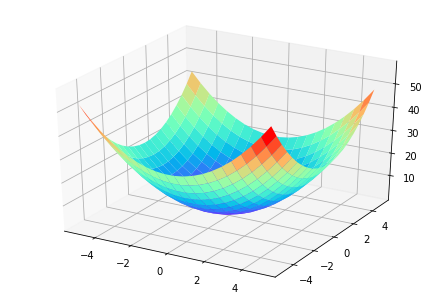

In [32]:
%matplotlib inline
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz, cmap='rainbow')
savefig('fit.svg', format='svg', dpi=1200)

In [16]:
gz_exp = gz + random.normal(0, 5, (len(x), len(y)))

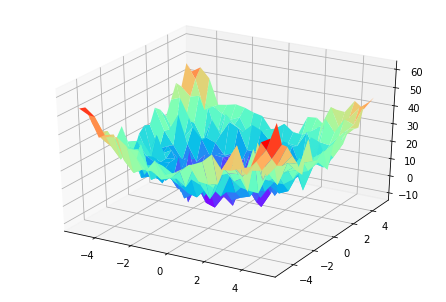

In [33]:
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz_exp, cmap='rainbow')
savefig('data.svg', format='svg', dpi=1200)

In [18]:
from scipy.optimize import least_squares

In [19]:
def cost_func(param):
    return (model(gx, gy, param[0], param[1]) - gz_exp).flatten()

In [20]:
res = least_squares(cost_func, [0., 0.])

In [21]:
res

 active_mask: array([0., 0.])
        cost: 5517.232204061805
         fun: array([-1.48068162e+00, -3.30154707e+00,  3.97229631e+00, -7.15457089e-01,
       -4.58987625e+00, -2.98274293e+00,  1.98956231e-01,  4.85330570e+00,
       -2.74565245e+00,  3.88405167e+00,  1.67862084e+00, -1.07196817e+00,
       -3.21995541e+00, -4.18343889e+00, -7.03567523e+00,  2.77421840e+00,
        5.30583438e+00,  6.66638750e+00,  8.78803263e+00, -4.74581461e-01,
        1.55461258e+00, -5.67616239e+00, -5.96008183e+00, -9.58166598e-01,
       -5.61488034e+00,  4.55424585e+00,  8.10209883e+00,  3.22128426e+00,
        1.45665751e+00,  4.38793080e+00,  2.15377699e+00, -2.48203260e+00,
       -6.51065418e+00,  2.59386250e+00,  4.76737703e+00,  5.69325232e+00,
       -5.31570239e+00, -1.16700194e+01,  6.67832885e+00,  2.53810858e+00,
       -2.09222011e-02, -9.91986826e+00,  7.69673621e-03,  2.95210378e+00,
        2.28521231e+00,  5.09648114e+00, -4.78127291e+00, -7.08936255e+00,
       -2.96723456e-01, 

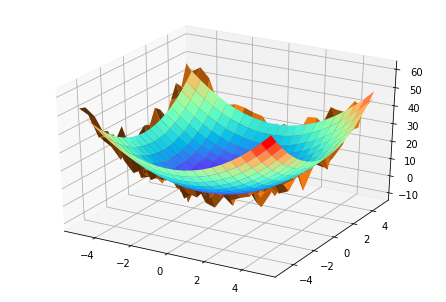

In [25]:
%matplotlib inline
gz_fit = model(gx, gy, res.x[0], res.x[1])
ax = Axes3D(figure())
ax.plot_surface(gx, gy, gz_fit, cmap='rainbow')
ax.plot_surface(gx, gy, gz_exp)